# Disease prediction

In this lab we're gonna work with data from heart disease dataset. We're gonna start to load the dataset from Kaggle, and get info on what the features definition is. Note that there are lot of errors in this dataset, for example: negative blood pressure och blood pressures that is unreasonable high.

### Quick check with google give me these values
* Age Range	Normal Blood Pressure Range (mmHg)
* Newborn	60/30 - 90/60
* Infants	85/50 - 95/65
* Children	90/55 - 110/75
* Adolescents	100/60 - 120/80
* Adults	90/60 - 120/80
* Adults	120/80 - 140/90
* Adults	140/90 - 160/100
* Adults	160/100 - 180/110
* Adults	180/110 or higher
# TODO: Get official statistics of this. 

There are 3 types of input features:

* Objective: factual information;
* Examination: results of medical examination;
* Subjective: information given by the patient.

## Features
* Age | Objective Feature | age | int (days)
* Height | Objective Feature | height | int (cm) |
* Weight | Objective Feature | weight | float (kg) |
* Gender | Objective Feature | gender | categorical code |
* Systolic blood pressure | Examination Feature | ap_hi | int |
* Diastolic blood pressure | Examination Feature | ap_lo | int |
* Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
* Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
* Smoking | Subjective Feature | smoke | binary |
* Alcohol intake | Subjective Feature | alco | binary |
* Physical activity | Subjective Feature | active | binary |
* Presence or absence of cardiovascular disease | Target Variable | cardio | binary |


In [1]:
import os


# visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# data science
import pandas as pd 
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from scipy.stats import norm
from scipy import stats

from scipy.stats import norm


# Set a default plt style
plt.style.use('ggplot')

In [2]:
file = '/Users/joeloscarsson/Documents/www/Machine-Learning/Projects/data3/cardio_train.csv'

In [3]:
cardio_train_df = pd.read_csv(file, delimiter=';')
nRow, nCol = cardio_train_df.shape
print(f"There are {nRow} rows and {nCol} columns")
print(cardio_train_df.columns)

There are 70000 rows and 13 columns
Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')


In [4]:
cardio_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [5]:
# Creating a dictionary to map the values to
cholesterol_map = {1: 'Normal', 2: 'Above normal', 3: 'Well above normal'}
glucose_map = {1: 'Normal', 2: 'Above normal', 3: 'Well above normal'}
smoking_map = {0: 'No', 1: 'Yes'}
alcohol_map = {0: 'No', 1: 'Yes'}
active_map = {0: 'No', 1: 'Yes'}
cardio_map = {0: 'No', 1: 'Yes'}
gender_map = {1: 'Female', 2:'Male'}

# Replacing the values in the dataframe
cardio_train_df['cholesterol'] = cardio_train_df['cholesterol'].replace(cholesterol_map)
cardio_train_df['gluc'] = cardio_train_df['gluc'].replace(glucose_map)
cardio_train_df['smoke'] = cardio_train_df['smoke'].replace(smoking_map)
cardio_train_df['alco'] = cardio_train_df['alco'].replace(alcohol_map)
cardio_train_df['active'] = cardio_train_df['active'].replace(active_map)
cardio_train_df['cardio'] = cardio_train_df['cardio'].replace(cardio_map)

# 2.0 EDA

a) How many are positive for hear disease and how many is negative?

We have this feature variable so we're take a closer look:

* Presence or absence of cardiovascular disease | Target Variable | cardio | binary |

No     35021
Yes    34979
Name: cardio, dtype: int64


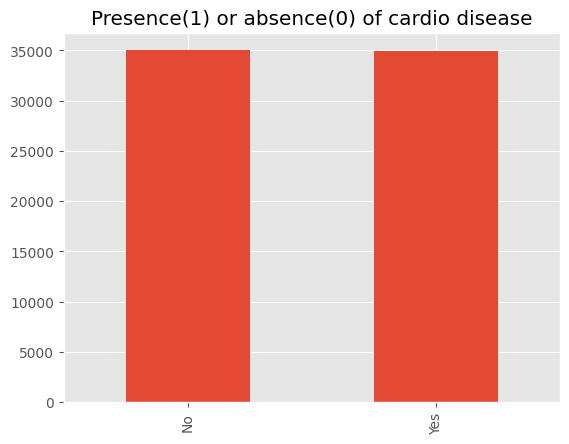

In [6]:
# We have 2 classes, 0 and 1. 0 means no cardio disease and 1 means cardio disease.
cardio_train_df['cardio'].value_counts().plot(kind='bar', title='Presence(1) or absence(0) of cardio disease')
print(cardio_train_df['cardio'].value_counts())


Almost 50/50

b) The share of how many normal, over normal and far above normal cholestrol

In [7]:
cardio_train_df['cholesterol'].value_counts()

Normal               52385
Above normal          9549
Well above normal     8066
Name: cholesterol, dtype: int64

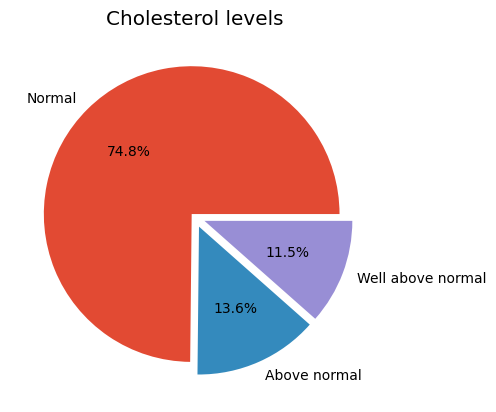

In [8]:
explode = (0.03, 0.07, 0.07)
plt.pie(cardio_train_df['cholesterol'].value_counts(), labels=['Normal', 'Above normal', 'Well above normal'], autopct='%1.1f%%', explode= explode );
plt.title('Cholesterol levels');

c) Age distribution histogram

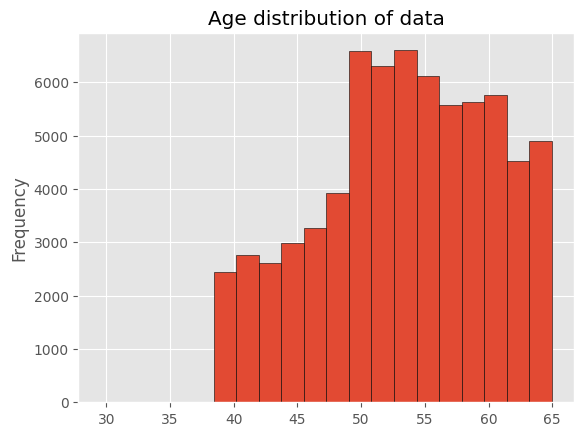

In [9]:
cardio_train_series = cardio_train_df['age'] / 365

cardio_train_series.plot(kind='hist', bins=20, title='Age distribution of data', edgecolor='black', linewidth=0.4);


d) Portion that smokes

In [10]:
cardio_train_df['smoke']

0         No
1         No
2         No
3         No
4         No
        ... 
69995    Yes
69996     No
69997     No
69998     No
69999     No
Name: smoke, Length: 70000, dtype: object

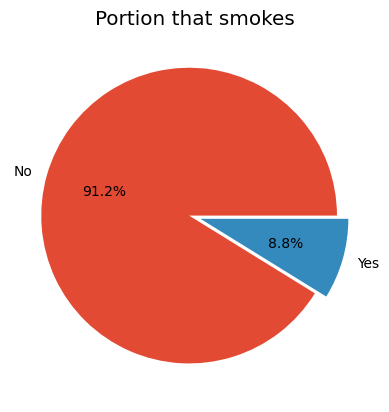

In [11]:
explode = (0.04, 0.04)
plt.pie(cardio_train_df['smoke'].value_counts(), labels=['No', 'Yes'], autopct='%1.1f%%', explode= explode );
plt.title('Portion that smokes');

e) How is the weight distribution?

In [12]:
cardio_train_df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,Normal,Normal,No,No,Yes,No
1,1,20228,1,156,85.0,140,90,Well above normal,Normal,No,No,Yes,Yes
2,2,18857,1,165,64.0,130,70,Well above normal,Normal,No,No,No,Yes
3,3,17623,2,169,82.0,150,100,Normal,Normal,No,No,Yes,Yes
4,4,17474,1,156,56.0,100,60,Normal,Normal,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,Normal,Normal,Yes,No,Yes,No
69996,99995,22601,1,158,126.0,140,90,Above normal,Above normal,No,No,Yes,Yes
69997,99996,19066,2,183,105.0,180,90,Well above normal,Normal,No,Yes,No,Yes
69998,99998,22431,1,163,72.0,135,80,Normal,Above normal,No,No,No,Yes


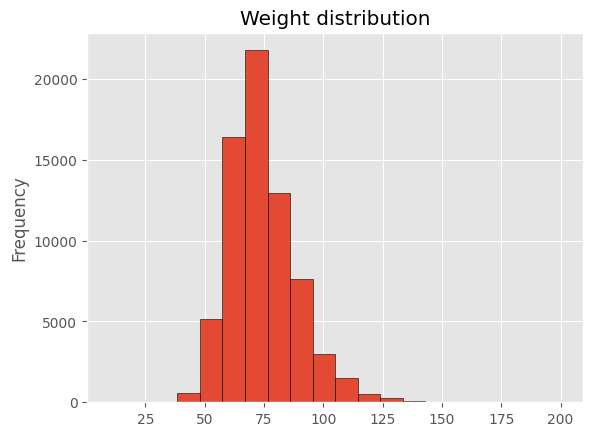

In [13]:
cardio_train_df['weight'].plot(kind='hist', bins=20, title='Weight distribution', edgecolor='black', linewidth=0.4);

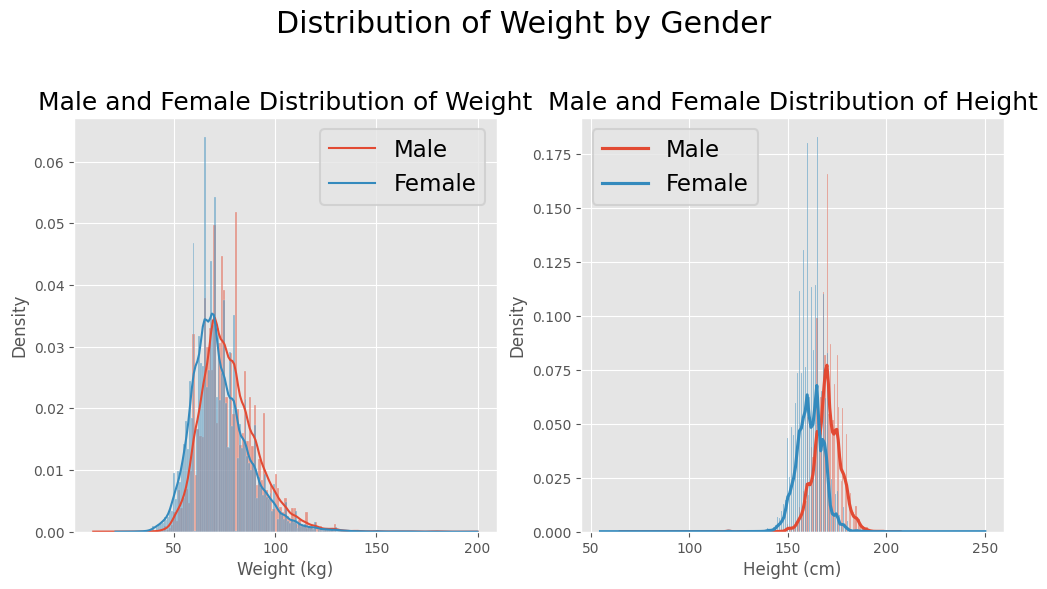

In [14]:
fig, ax = plt.subplots(1,2, figsize= (12,6))

# first plot
sns.histplot(ax = ax[0], x = "weight", data=cardio_train_df[cardio_train_df["gender"] == 2], stat="density", kde=True) # male  
sns.histplot(ax = ax[0], x = "weight", data=cardio_train_df[cardio_train_df["gender"] == 1], stat="density", kde=True)# female
sns.set_context("talk")
fig.subplots_adjust(top=.8)
fig.suptitle('Distribution of Weight by Gender')

ax[0].set(title="Male and Female Distribution of Weight", xlabel= "Weight (kg)", ylabel= "Density")
ax[0].legend(["Male","Female"])

# second plot
sns.histplot(ax = ax[1], x = "height", data=cardio_train_df[cardio_train_df["gender"] == 2], stat="density", kde=True) # Male
sns.histplot(ax = ax[1], x = "height", data=cardio_train_df[cardio_train_df["gender"] == 1], stat="density", kde=True) # female

ax[1].set(title="Male and Female Distribution of Height", xlabel= "Height (cm)", ylabel= "Density")
ax[1].legend(["Male","Female"])

plt.show()

g)  How big share of women and men has heart disease?


# TODO: Plot this correctly

In [15]:
cardio_train_df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,Normal,Normal,No,No,Yes,No
1,1,20228,1,156,85.0,140,90,Well above normal,Normal,No,No,Yes,Yes
2,2,18857,1,165,64.0,130,70,Well above normal,Normal,No,No,No,Yes
3,3,17623,2,169,82.0,150,100,Normal,Normal,No,No,Yes,Yes
4,4,17474,1,156,56.0,100,60,Normal,Normal,No,No,No,No


In [16]:
# Sorting patients by gender and if they have cardio disease or not
male = cardio_train_df.query('gender > 1')
female = cardio_train_df.query('gender < 2')
female_disease = female[female['active'] == 1]
male_disease = male[male['active'] == 1]
print(male.shape)
print(female.shape)

(24470, 13)
(45530, 13)


Yes    19745
No      4725
Name: active, dtype: int64


<Axes: title={'center': 'yes and no'}>

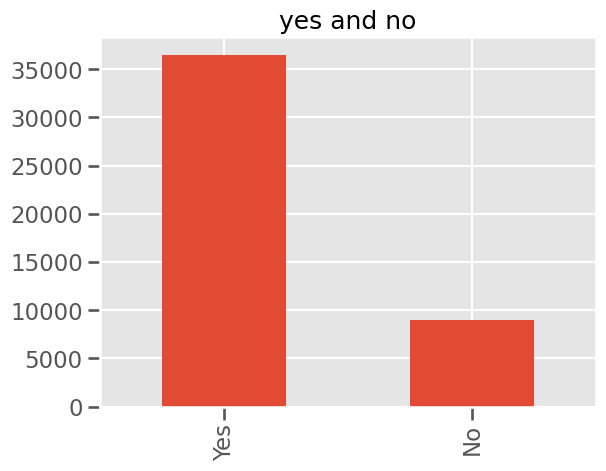

In [17]:
male['active'].value_counts().plot(kind='bar', title='yes and no')
print(male['active'].value_counts())
female['active'].value_counts().plot(kind='bar', title='yes and no')

--------------
Feature engiinering BMI

Create a feature for BMI(Body mass index)

* a) Throw the samples with not possible BMIers and outliers. Note that it can be hard to decide in which range of BMI we gonna use. Describe how you came up with your limits.


* b) Create a categorial BMI-feature with categories: normal range, overweight, obese (class I), obese (class II), obese(class III)

The limits i'm gonna use that came from https://en.wikipedia.org/wiki/Body_mass_index
Note that this is Basic categories and BMI can change for different regions, for instance Hong kong or Japan.

is:
*                 BMI (kg/m^^2) (BMI Prime)
* Normal range	18.5 – 24.9	0.74 – 0.99
* Overweight (Pre-obese)	25.0 – 29.9	1.00 – 1.19
* Obese (Class I)	30.0 – 34.9	1.20 – 1.39
* Obese (Class II)	35.0 – 39.9	1.40 – 1.59
* Obese (Class III)	≥ 40.0	≥ 1.60  # Highest threshold 55

In [18]:
# Calculate BMI for each person and creating a new column
cardio_train_df['bmi'] = cardio_train_df['weight'] / ((cardio_train_df['height'] / 100) ** 2)
cardio_train_df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,0,18393,2,168,62.0,110,80,Normal,Normal,No,No,Yes,No,21.967120
1,1,20228,1,156,85.0,140,90,Well above normal,Normal,No,No,Yes,Yes,34.927679
2,2,18857,1,165,64.0,130,70,Well above normal,Normal,No,No,No,Yes,23.507805
3,3,17623,2,169,82.0,150,100,Normal,Normal,No,No,Yes,Yes,28.710479
4,4,17474,1,156,56.0,100,60,Normal,Normal,No,No,No,No,23.011177


In [19]:
cardio_train_df['bmi'].describe()

count    70000.000000
mean        27.556513
std          6.091511
min          3.471784
25%         23.875115
50%         26.374068
75%         30.222222
max        298.666667
Name: bmi, dtype: float64

We can see that there is some impossible values for BMI in this dataset. For instance someone with a BMI of 298? and 3.4? That is unreasonable.

In [20]:
# Plot a boxplot on outliers for the BMI column to see outliers

fig = px.box(cardio_train_df, x='bmi');

fig.show()

Removing outliers based on the the limits that i wrote above. Note that i increased the threshold to 50 to be able to make obese(class III):

* kg < 15 BMI
* kg > 50 BMI

# TODO: We used Tukeys rule to remove outliers. 

In [24]:
# # TODO: Tukeys rule fråga om denna: eftersom vi bestämmer ju själva hur många outliers vi vill ha som är baserat på BMI rangen...

def clean_outliers(cardio_train_df, column='bmi'):
    q1 = cardio_train_df[column].quantile(0.25)
    q3 = cardio_train_df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    cardio_train_df = cardio_train_df[(cardio_train_df[column] > lower_bound) & (cardio_train_df[column] < upper_bound)]
    return cardio_train_df

cardio_train_df = clean_outliers(cardio_train_df, column='bmi')
cardio_train_df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,bmi
count,67882.000000,67882.000000,67882.000000,67882.000000,67882.000000,67882.000000,67882.000000,67882.000000
mean,49969.446495,19458.747208,1.356118,164.581229,73.108792,128.362629,95.847132,26.999344
std,28861.008287,2469.367087,0.478854,7.810813,12.736949,148.322829,184.364209,4.418274
min,0.000000,10798.000000,1.000000,120.000000,28.000000,-150.000000,-70.000000,15.012197
25%,24993.500000,17649.000000,1.000000,159.000000,65.000000,120.000000,80.000000,23.828125
50%,49994.000000,19697.000000,1.000000,165.000000,71.000000,120.000000,80.000000,26.218821
75%,74892.750000,21319.000000,2.000000,170.000000,81.000000,140.000000,90.000000,29.752066
max,99999.000000,23713.000000,2.000000,207.000000,135.000000,16020.000000,10000.000000,39.476813


In [23]:
# def filter_bmi_outliers(cardio_train_df, lower_bound=15, upper_bound=50, column='bmi'):
#     mask = (cardio_train_df[column] > lower_bound) & (cardio_train_df[column] < upper_bound)
#     cardio_train_df = cardio_train_df.loc[mask]
#     return cardio_train_df

# cardio_train_df = filter_bmi_outliers(cardio_train_df)
# cardio_train_df['bmi'].describe()

count    69729.000000
mean        27.416604
std          5.058418
min         15.012197
25%         23.875115
50%         26.365603
75%         30.119376
max         50.000000
Name: bmi, dtype: float64

* b) Create a categorial BMI-feature with categories: normal range, overweight, obese (class I), obese (class II), obese(class III)

In [26]:
cardio_train_df['normal_range'] = cardio_train_df['bmi'].apply(lambda x: 1 if x >= 18.5 and x <= 25 else 0)
# TODO: Maybe also rename???
cardio_train_df.head()


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,normal_range
0,0,18393,2,168,62.0,110,80,Normal,Normal,No,No,Yes,No,21.967120,1
1,1,20228,1,156,85.0,140,90,Well above normal,Normal,No,No,Yes,Yes,34.927679,0
2,2,18857,1,165,64.0,130,70,Well above normal,Normal,No,No,No,Yes,23.507805,1
3,3,17623,2,169,82.0,150,100,Normal,Normal,No,No,Yes,Yes,28.710479,0
4,4,17474,1,156,56.0,100,60,Normal,Normal,No,No,No,No,23.011177,1
